# Data   Analysis   Interview   Challenge 
 
This   is   your   chance   to   wow   us   with   creative   and   rigorous   solutions!   Please   include   your   code   at 
the   end   of   your   submission,   or   in   a   separate   file.   We   also   accept   incomplete   solutions. 


# Part   1   ‑   Exploratory   data   analysis 
The   attached    logins.json    file   contains   (simulated)   timestamps   of   user   logins   in   a   particular 
geographic   location.   Aggregate   these   login   counts   based   on   15­ minute   time   intervals,   and 
visualize   and   describe   the   resulting   time   series   of   login   counts   in   ways   that   best   characterize   the 
underlying   patterns   of   the   demand.   Please   report/illustrate   important   features   of   the   demand, 
such   as   daily   cycles.   If   there   are   data   quality   issues,   please   report   them. 

#### Required Library

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#### Loading Json file

In [248]:
df_login = pd.read_json("logins.json")
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [249]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [250]:
df_login.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648247
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


From the above information we can find max and min date in the dataset and total count of samples.

In [251]:
df_login.value_counts()

login_time         
1970-04-12 04:03:15    3
1970-02-12 11:16:53    3
1970-03-14 17:45:52    3
1970-01-06 21:45:52    3
1970-04-04 01:17:40    3
                      ..
1970-03-15 23:03:17    1
1970-03-15 23:04:57    1
1970-03-15 23:06:17    1
1970-03-15 23:06:24    1
1970-01-01 20:12:16    1
Length: 92265, dtype: int64

As per above information there are 92265 unique values in the data set hence some of the values repeat itself

In [252]:
df_login["login_count"] = 1
interval15 = df_login.set_index("login_time").groupby(pd.Grouper(freq='15Min')).count()
interval15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<AxesSubplot:xlabel='time'>

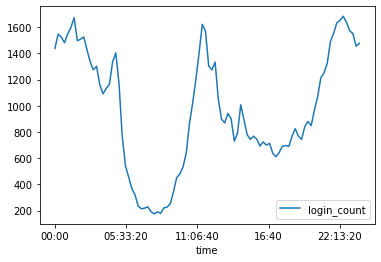

In [253]:
interval15.groupby(interval15.index.time).sum().plot()

<AxesSubplot:xlabel='login_time'>

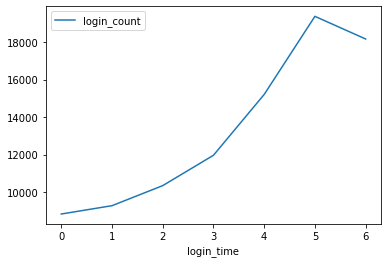

In [254]:
interval15.groupby(interval15.index.weekday).sum().plot()

<AxesSubplot:xlabel='login_time'>

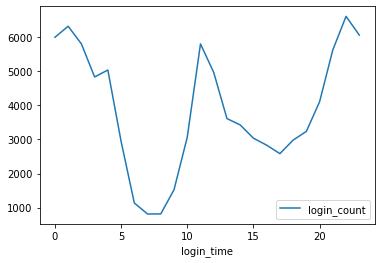

In [255]:
interval15.groupby(interval15.index.hour).sum().plot()

# Part   2   ‑   Experiment   and   metrics   design 
The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on 
weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active 
during   the   day.   On   weekends,   there   is   reasonable   activity   in   both   cities. 
 
However,   a   toll   bridge,   with   a   two ­way   toll,   between   the   two   cities   causes   driver   partners   to   tend 
to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have 
proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by 
reimbursing   all   toll   costs.

1. What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in 
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric? 

>    An incentive program that refunds toll charges incured during the most active time when customer travel b/w the cities would encourage them to take up such rides. This however while generating funds in a particular interval time for the rest of them , it will again discourage driver partners as they will be less incentivized this might workout to increase sales for some time, but will also create issues like driver partners not willing to travel intercity during the off rush time. That might cause damage to Ultimats reputation.


>    Further this can be modified a little by creating incentive based on min 3 rides to the city and for next 3 rides driver partner will be reimbursed.


>    As the two way toll cost will be a constant , total toll cost should be ideal metric, to find if this experiment was successful or not.

>    Boolean metric for intercity travel with TRUE and FALSE will be usefull to check the both who traveled most b/w the cities and who did not hence creating incentive program to target the drivers who are not, profits can be generated.



2. Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the 
proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on:  


>     a. how you will implement the experiment ?
>          Randomly selecting 5-10 % drivers for this program and conduct this as promotional event for the driver partners.Continue to collect data for at least 90 days to get optimal info and compare it to the previous year data. Check for total revenue generated for 60 day period in past with the last 60 days of the promotional event. similarly check the total rides between the cities before and after this would give idea if the experiment was successfull and sustainable from a revenue percpective or if this would incure cost on the firm.

>     b. what statistical test(s) you will conduct to verify the significance of the observation ?



>       Null hypothesis method can be used here. 

>       Null Hypothesis : Total income of Ultimate Driver-partner to remains same under promotional event.
        Alternate Hypothesis : Total income of Ultimate Driver-partner to changed under promotional event.
        
        
This can be done for both cities seperatly better outcome.


>     c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

If the t-static method is showing sigmificant then this would reject the null hypothesis. Which would mean that there is some benefits from the event.

Limitation: Might have issues if this event is run in middle of climate changing months as the trafic changes drastically between summer and winter , likewise holiday season might see a peak in travel for some time and might simmer down till the end of the season. 

# Part   3   ‑   Predictive   modeling 
 
Ultimate   is   interested   in   predicting   rider   retention.   To   help   explore   this   question,   we   have 
provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account   in 
January   2014.   The   data   was   pulled   several   months   later;   we   consider   a   user   retained   if   they 
were   “active”   (i.e.   took   a   trip)   in   the   preceding   30   days. 
 
We   would   like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors 
for   retention,   and   offer   suggestions   to   operationalize   those   insights   to   help   Ultimate. 
 
The   data   is   in   the   attached   file   ultimate_data_challenge.json.   See   below   for   a   detailed 
description   of   the   dataset.   Please   include   any   code   you   wrote   for   the   analysis   and   delete   the 
dataset   when   you   have   finished   with   the   challenge




#### 1. Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided 
data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What 
fraction   of   the   observed   users   were   retained? 

#### Loading data

In [256]:
ultimate_datadf= pd.read_json("ultimate_data_challenge.json")

In [257]:
ultimate_datadf.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [258]:
ultimate_datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


As seen above that there are two features that have fe NaN values hence chekcing below on how many are missing.

In [259]:
ultimate_datadf.avg_rating_of_driver.isnull().value_counts()

False    41878
True      8122
Name: avg_rating_of_driver, dtype: int64

In [260]:
ultimate_datadf.avg_rating_by_driver.isnull().value_counts()

False    49799
True       201
Name: avg_rating_by_driver, dtype: int64

As the ratings is min 1 and hence assuming Nan values to be 0. hence replacing Nan values.

In [261]:
ultimate_datadf=ultimate_datadf.dropna()

In [262]:
ultimate_datadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


<AxesSubplot:xlabel='city', ylabel='count'>

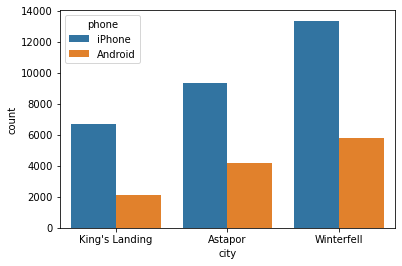

In [264]:
sns.countplot(x="city",data=ultimate_datadf,hue="phone")

In [216]:
ultimate_datadf.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [217]:
ultimate_datadf["last_trip_date"]=pd.to_datetime(ultimate_datadf["last_trip_date"])
ultimate_datadf["signup_date"]=pd.to_datetime(ultimate_datadf["signup_date"])

In [218]:
ultimate_datadf["days_active"] = ultimate_datadf["last_trip_date"] - ultimate_datadf["signup_date"]

In [219]:
ultimate_datadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    41445 non-null  object         
 1   trips_in_first_30_days  41445 non-null  int64          
 2   signup_date             41445 non-null  datetime64[ns] 
 3   avg_rating_of_driver    41445 non-null  float64        
 4   avg_surge               41445 non-null  float64        
 5   last_trip_date          41445 non-null  datetime64[ns] 
 6   phone                   41445 non-null  object         
 7   surge_pct               41445 non-null  float64        
 8   ultimate_black_user     41445 non-null  bool           
 9   weekday_pct             41445 non-null  float64        
 10  avg_dist                41445 non-null  float64        
 11  avg_rating_by_driver    41445 non-null  float64        
 12  days_active             41445 no

In [220]:
last_date = ultimate_datadf["last_trip_date"].max()
print(last_date)
first_date = ultimate_datadf["signup_date"].min()
print(first_date)
diff = last_date-first_date
print(diff)


2014-07-01 00:00:00
2014-01-01 00:00:00
181 days 00:00:00


In [221]:
data1 = ultimate_datadf[pd.to_datetime(last_date) - pd.to_datetime(ultimate_datadf['last_trip_date']) < pd.Timedelta('30 days')]
retained = (float(len(data1)) / len(ultimate_datadf)) * 100
print('Percentage of users retained: %.2f%%' % retained)

Percentage of users retained: 40.07%


In [222]:
ultimate_datadf["retained"] = pd.to_datetime(last_date) - ultimate_datadf['last_trip_date'] < pd.Timedelta('30 days')

ultimate_datadf = ultimate_datadf.drop("last_trip_date",axis=1)
ultimate_datadf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,retained
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,143 days,True
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,96 days,False
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,1 days,False
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,170 days,True
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,47 days,False


#### 2. Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active 
in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what 
alternatives   you   considered,   and   any   concerns   you   have.   How   valid   is   your   model? 
Include   any   key   indicators   of   model   performance

In [238]:
data_dummies = pd.get_dummies(ultimate_datadf)

In [239]:
data_dummies = data_dummies.drop(["signup_date","days_active"],axis=1)
data_dummies

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,False,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,4.8,1.11,11.1,True,55.6,2.53,4.7,True,1,0,0,0,1
49994,1,4.6,1.44,37.5,False,25.0,2.25,4.5,False,1,0,0,0,1
49995,0,5.0,1.00,0.0,False,100.0,5.63,4.2,True,0,1,0,0,1
49997,0,5.0,1.00,0.0,True,100.0,3.86,5.0,False,0,0,1,1,0


In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [241]:
X = data_dummies.drop(["retained"], axis = 1)
y = data_dummies["retained"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 42)

In [242]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Rahul KG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [243]:
print('Classifier train accuracy: %.2f%%' % (logreg.score(X_train, y_train) * 100))
print('Classifier test accuracy: %.2f%%' % (logreg.score(X_test, y_test) * 100))

Classifier train accuracy: 71.18%
Classifier test accuracy: 71.01%


In [245]:
print(confusion_matrix(y_test, y_pred))


[[6142 1285]
 [2319 2688]]


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.83      0.77      7427
        True       0.68      0.54      0.60      5007

    accuracy                           0.71     12434
   macro avg       0.70      0.68      0.69     12434
weighted avg       0.71      0.71      0.70     12434



As you can see that the test accuracy for a Logestic regression based model only gives a accuracy of 71 % which is not great. Results might improve if we try other models, but not by much.

#### 3. Briefly   discuss   how   Ultimate   might   leverage   the   insights   gained   from   the   model   to improve   its   long­ term   rider   retention   (again,   a   few   sentences   will   suffice). 

1. As part of EDA it can been seens that there is a lot of iphone user compared to android user , marketing statergies can be made accordingly.

2. Data seems to be uncorrelated with retention, getting better data that is connected to retention might get better results.